In [19]:
import pickle
from scipy.optimize import curve_fit
%matplotlib notebook
import numpy as np
%run gas_2d.py
from numpy.random import random

In [5]:
with open('longsim2.dat','rb') as data:
    longsim = pickle.load(data)

#with open('longsim2.dat','rb') as data:
#    longsim2 = pickle.load(data)
with open('longsim.dat','rb') as data:
    longsim1 = pickle.load(data)

longsim initial conditions:
* Particles:200
* Box length:100
* x/y components of momenta:0.5
* dt=0.25
* steps:10,000

longsim2 (Extra Long simulation) initial conditions:
* Particles:200
* Box length:100
* x/y components of momenta:0.5
* dt=0.25
* steps:30,000

In [21]:
y = []

for i in range(1,2501) :
    KE=0
    for j in longsim.trajectory[i]:
        KE = KE + 0.5 * (j.momentum.norm())**2 / j.mass
    y = y + [KE]
    
x = np.linspace(0, longsim.dt * 10000, len(y) )  

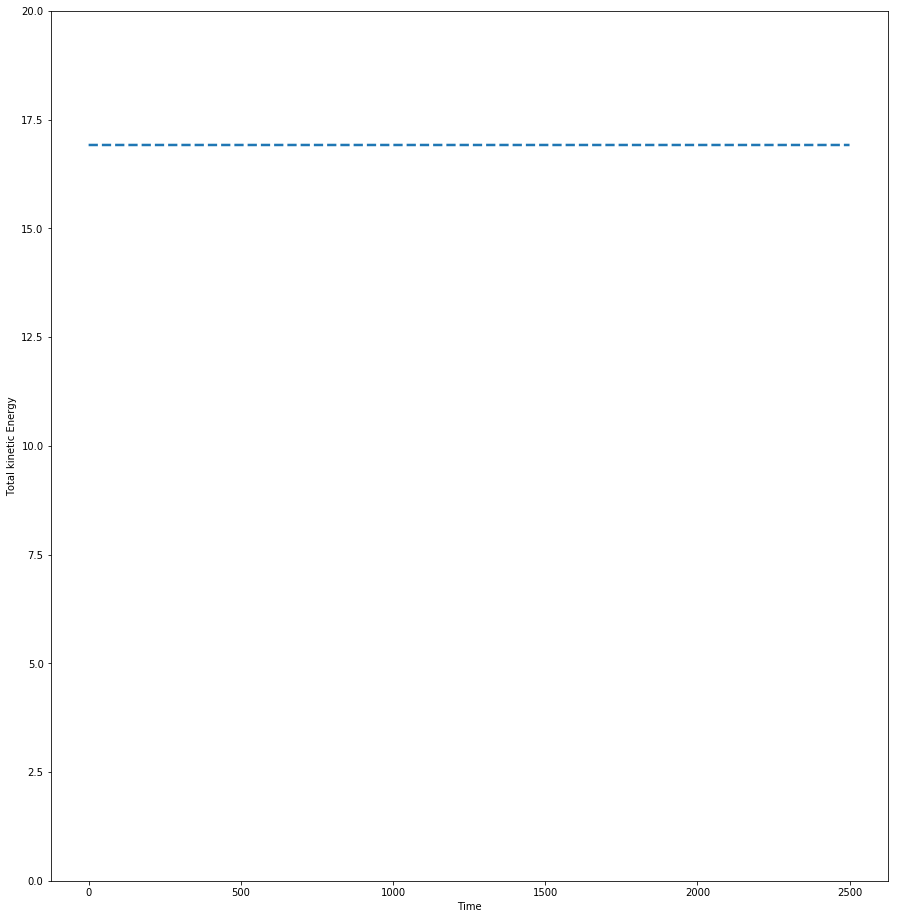

In [22]:
plot (x, y, linewidth=2.5,linestyle="--")
ylim(0,20)
figsize(15,16)
xlabel('Time')
ylabel('Total kinetic Energy')
show()

Here is a plot of total KE of the system of particles over time. The time step for this simulation is 0.25 with 10,000 steps ran. The graph shows a line with 0 gradient, meaning that the total KE is constant throughout the simulation. This fits the requirements of an ideal gas where all collisions are elastic, PE is 0 and has constant KE.

In [24]:
y1 = []

for i in range(1,2501) :
    speedlist = []
    for j in longsim.trajectory[i]:
        speed = j.momentum.norm() / j.mass
        speedlist = speedlist + [speed]
    y1 = y1 + [std (speedlist, ddof = 1)]

x1 = np.linspace(0, longsim.dt * 10000, len(y1) ) 

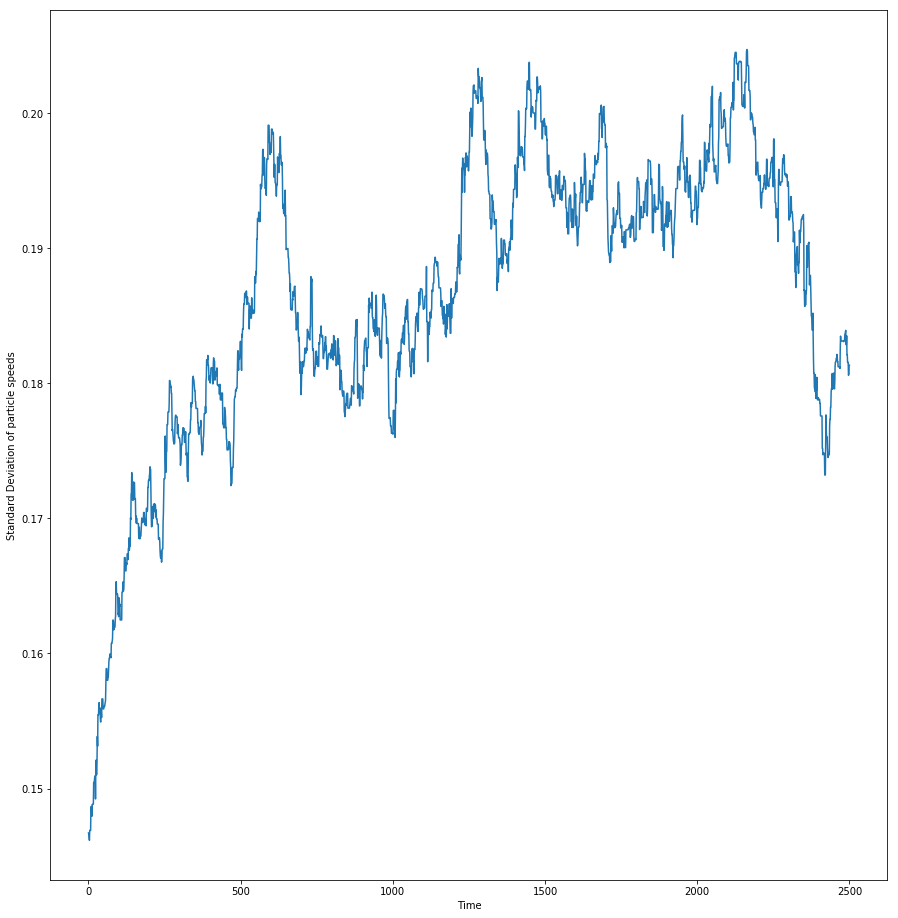

In [25]:
plot (x1, y1)
xlabel('Time')
ylabel('Standard Deviation of particle speeds')
figsize(15,16)
show()

As the systems tends towards equilibirum, the distribution of particle speeds would approach the maxwell-boltzmann distribution. This would give a roughly constant value of standard deviation. Following the graph, it can be seen that the standard deviation starts out with a smaller value in the beginnning, indicating more similar speeds between particles. However as time increases, the standard deviation increases and particle speeds become more extreme. At the end of the simulation the value hovers between 0.21 and 0.18, this shows that the system is in equilibrium.

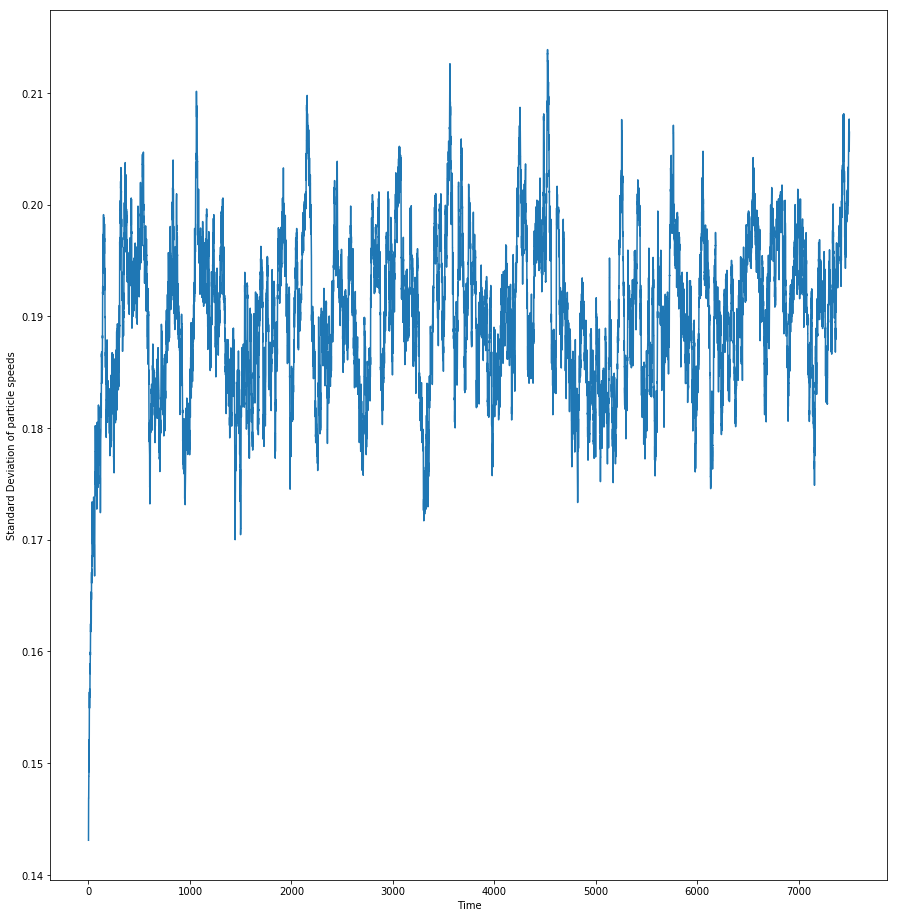

In [27]:
y2 = []

for i in longsim.trajectory :
    speedlist = []
    for j in i:
        speed = j.momentum.norm() / j.mass
        speedlist = speedlist + [speed]
    y2 = y2 + [std (speedlist, ddof = 1)]

x2 = np.linspace(0, longsim.dt * len(longsim.trajectory), len(y2) ) 

plot (x2, y2)
xlabel('Time')
ylabel('Standard Deviation of particle speeds')
figsize(15,16)
show()

When the simulation steps were increased to 30000, the same trend can be seen and the standard deviation oscillates between 0.17 and 0.21.

<IPython.core.display.Javascript object>


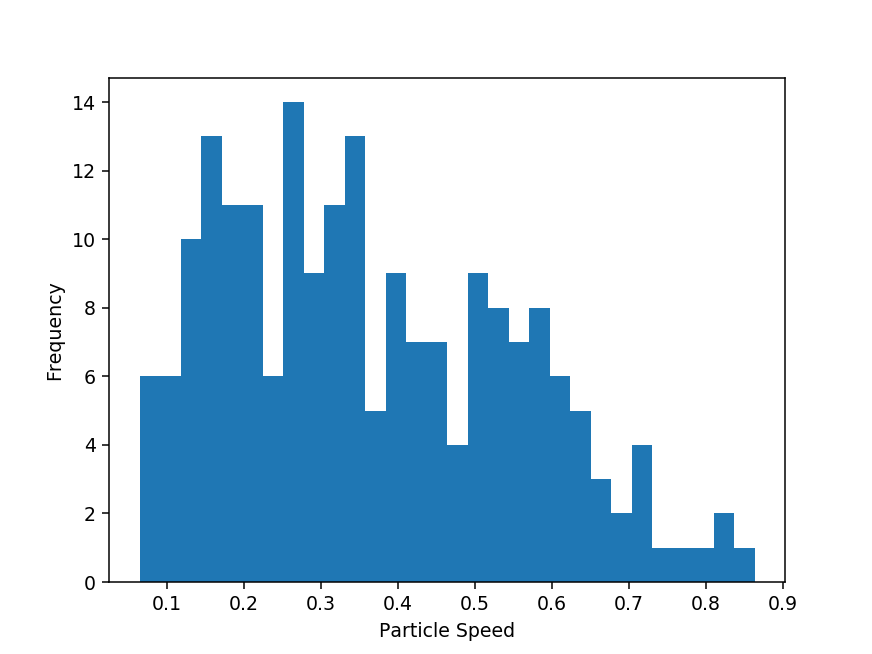

In [22]:
from ipywidgets import interact
from matplotlib.pyplot import *

#@interact(t=(0,2500,1))
#def plot_speeds(t):
t=1130
speedlist = []
for j in longsim.trajectory [1130]:
    speed = j.momentum.norm() / j.mass
    speedlist = speedlist + [speed]
hist(speedlist, bins = 30)
xlabel('Particle Speed')
ylabel('Frequency')
show()


At around step 1130, the distrubution of particle speeds stop changing significantly and resembles the maxwell-boltzmann distribution. To calculate the average energy for the ideal gas, the total kinetic energy of the gas is averaged over the number of particles. Using the total KE obtained from above.

In [28]:
avgE = y[1]/200
avgE

0.08460028538915078

Taking the boltzmann constant to equal 1, the temperature of of the gas would be 0.08460028538915078. Step 2070 was chosen at random for analysis when the system is in equilibrium. Below, the distribution of particle speeds are visualized as a histogram. The respective probability distribution equations are plotted as a greenline on top of the histogram, substituting the mass of the particles as 1. 

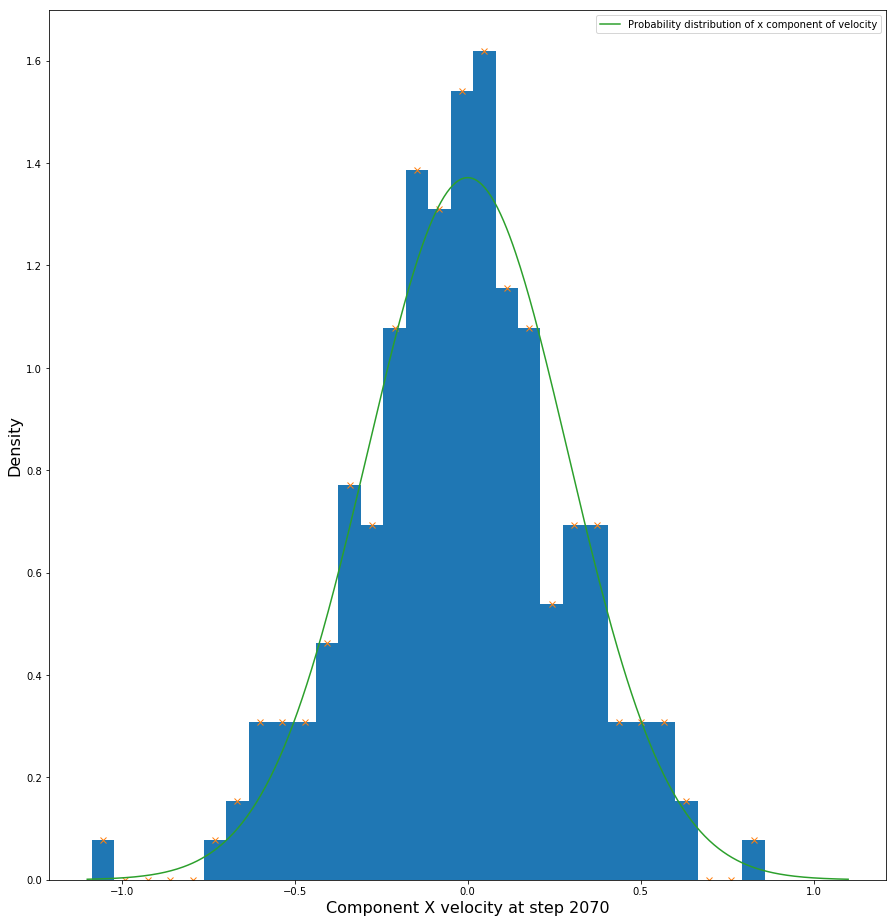

In [29]:
speedlist = []
for j in longsim.trajectory [2070]:
        speed = j.momentum.x / j.mass
        speedlist = speedlist + [speed]
data = hist(speedlist, bins = 30, density = 1)
histx = [0.5 * (data[1][i + 1] - data[1][i]) + data[1][i] for i in range(len(data[1]) - 1)]
histy = data[0]
plot(histx, histy, linestyle = '', marker = 'x')
xlabel('Component X velocity at step 2070', size = 16)
ylabel('Density', size = 16)

def px (v, kB, T):
    
    return sqrt ( longsim.trajectory [2070][1].mass / (2 * pi * kB * T) ) * e ** (-1* (longsim.trajectory [2070][1].mass * v ** 2) / (2 * kB * T) )

xrange = linspace(-1.1, 1.1, 500)
plot (xrange, px( xrange, 1 , 0.08460028538915078), label = 'Probability distribution of x component of velocity')
legend()
show()


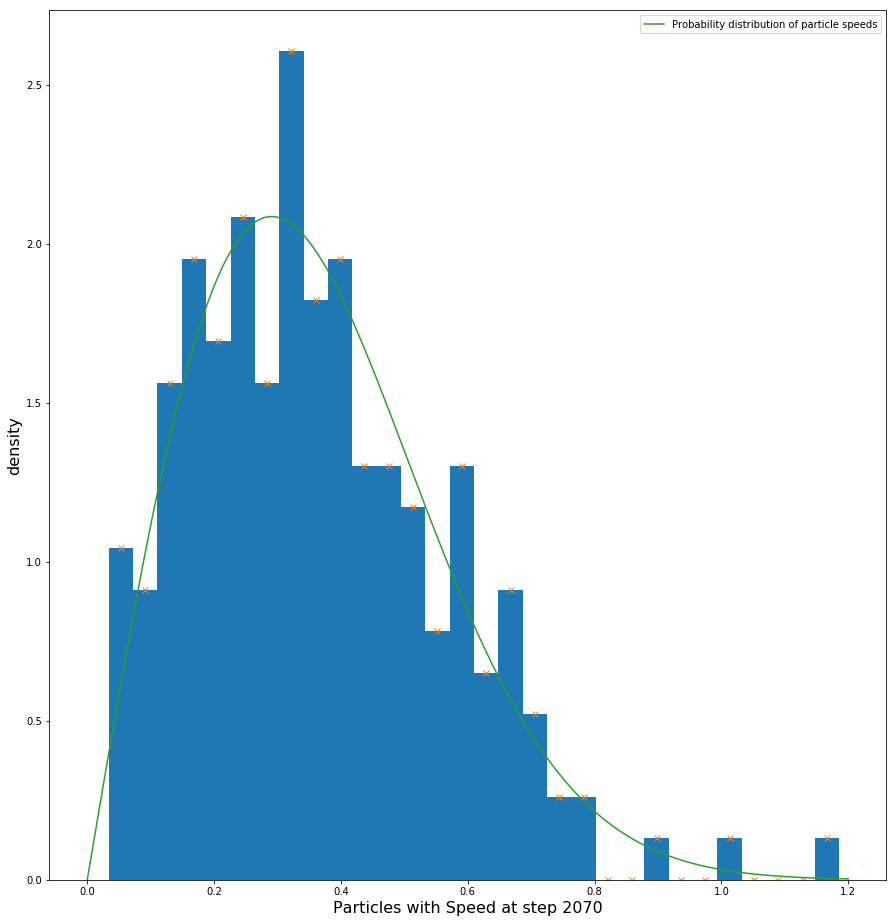

In [30]:
speedlist = []
for j in longsim.trajectory [2070]:
        speed = j.momentum.norm() / j.mass
        speedlist = speedlist + [speed]
data1 = hist(speedlist, bins = 30, density = 1)
histx1 = [0.5 * (data1[1][i + 1] - data1[1][i]) + data1[1][i] for i in range(len(data1[1]) - 1)]
histy1 = data1[0]
plot(histx1, histy1, linestyle = '', marker = 'x')

def p (v, T):
    return longsim.trajectory [2070][1].mass * v / ( 1 * T)  * e ** (-1* (longsim.trajectory [2070][1].mass * v ** 2) / (2 * 1 * T) )

xrange1 = linspace(0, 1.2, 500)

plot (xrange1, p( xrange1, 0.08460028538915078), label = 'Probability distribution of particle speeds')
xlabel('Particles with Speed at step 2070', size = 16)
ylabel('density', size = 16)
legend()
show()


Both of the graphs above show a good match between the simulation distribution and the theoretical distribution for a 2D ideal gas. This supports the simulation as a good representation of the ideal gas and the correctness of the theory. There are a few outliers within the distribution where the frequency of particles with particular speeds being much higher than the theory predicts, however this would be eliminated if the distributions were averaged over a wide range of steps as compared to the current case. 

In [31]:
x_pos=[]
for j in longsim.trajectory[2070]:
    x_pos = x_pos +  [j.position.x]

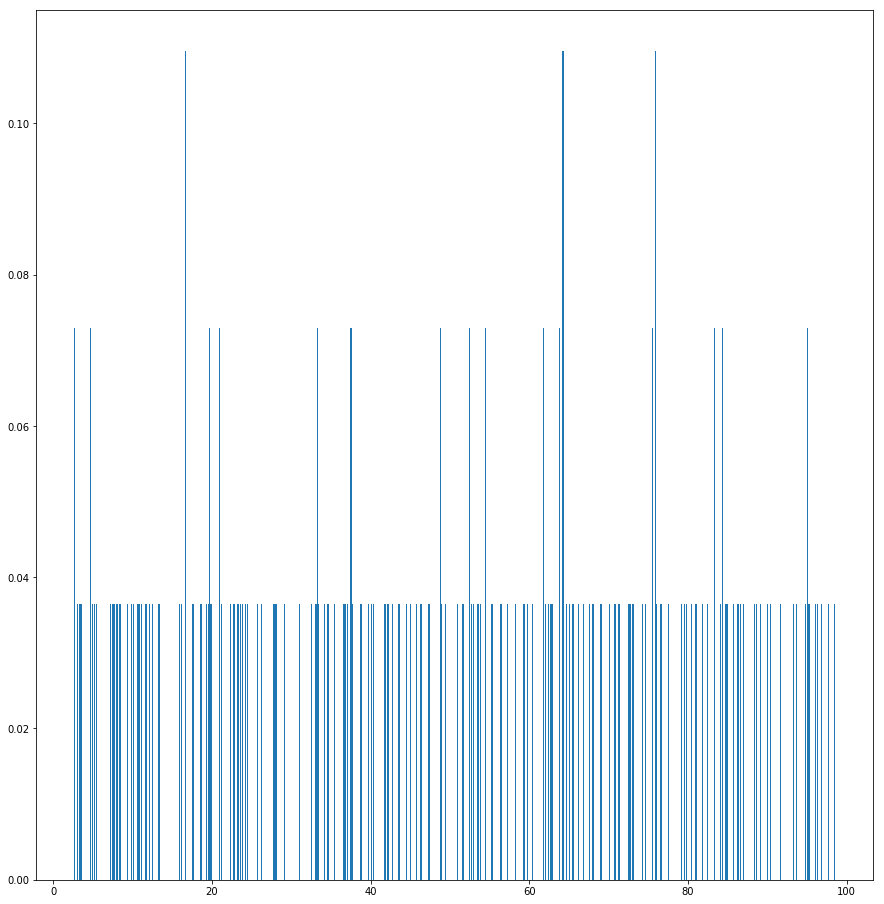

In [32]:
hist(x_pos, bins = 700, density = 1)
show()

In step 2070 when the system is in equilibrium, all particles are split fairly equally across the x axis, with only a few overlapping particles with the same x position.

In [4]:
x_pos2=[]
for i in range(5000,10000):
    percentage_complete = ((i-5000) / 5000) * 100
    print (percentage_complete, '%', end="\r")
    for j in longsim.trajectory[i]:
        x_pos2 = x_pos2 +  [j.position.x]

When the x positions of all 10000 timesteps are added together, the particles are again seen to be distributed equally throughout the x axis, with exceptions at the sides of the box where it is 0. The probability of finding particles then increases sharply towards the center, averaging at 0.01. This shows similarity to the radial distribution function for gases and liquid, with regular peaks, displaying a degree of ordered structure.

<IPython.core.display.Javascript object>


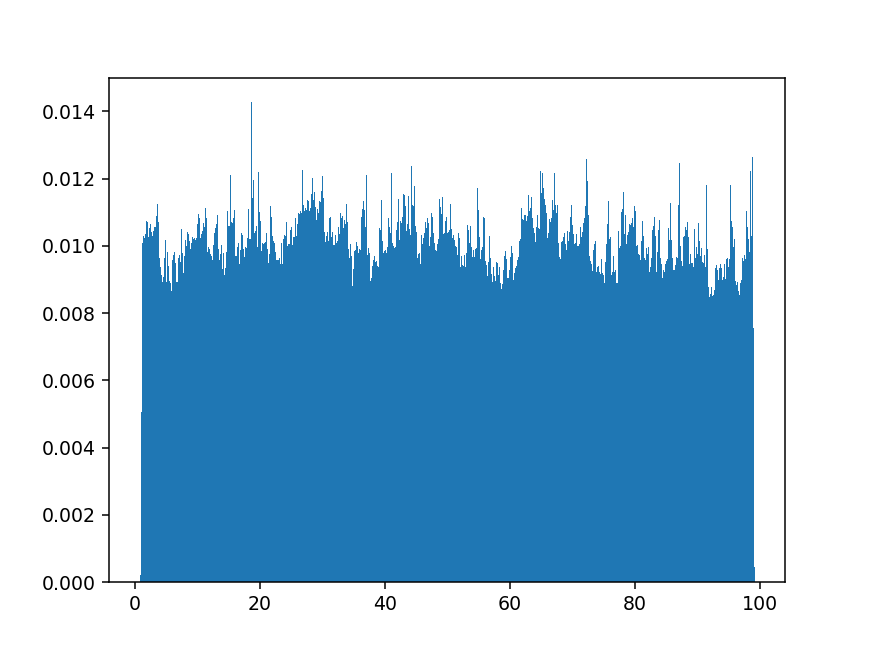

In [11]:
hist(x_pos2, bins = 700, density = 1)
show()

When the x positions of the second half of the simulation (5000-10000)are added together, the particles are again seen to be distributed equally throughout the x axis, with exceptions at the sides of the box where it is 0. The probability of finding particles then increases sharply towards the center, averaging at 0.01. This shows similarity to the radial distribution function for gases and liquid, with regular peaks, displaying a degree of ordered structure.

In [106]:
highDensSim = Simulation( init_randomsqrlongsim(800, 100), 100, 0.25 )
for i in range(0, 2501):
    highDensSim.step()
    percentage_complete = (i / 2501) * 100
    #print(i)
    print (percentage_complete, '%', end="\r")

In [38]:
with open('highdens.dat','rb') as data:
    highDensSim = pickle.load(data)

In [50]:
x_pos2=[]
for i in range(0,2500):
    percentage_complete = (i / 2500) * 100
    #print(i)
    print (percentage_complete, '%', end="\r")
    for j in highDensSim.trajectory[i]:
        x_pos2 = x_pos2 +  [j.position.x]

<IPython.core.display.Javascript object>


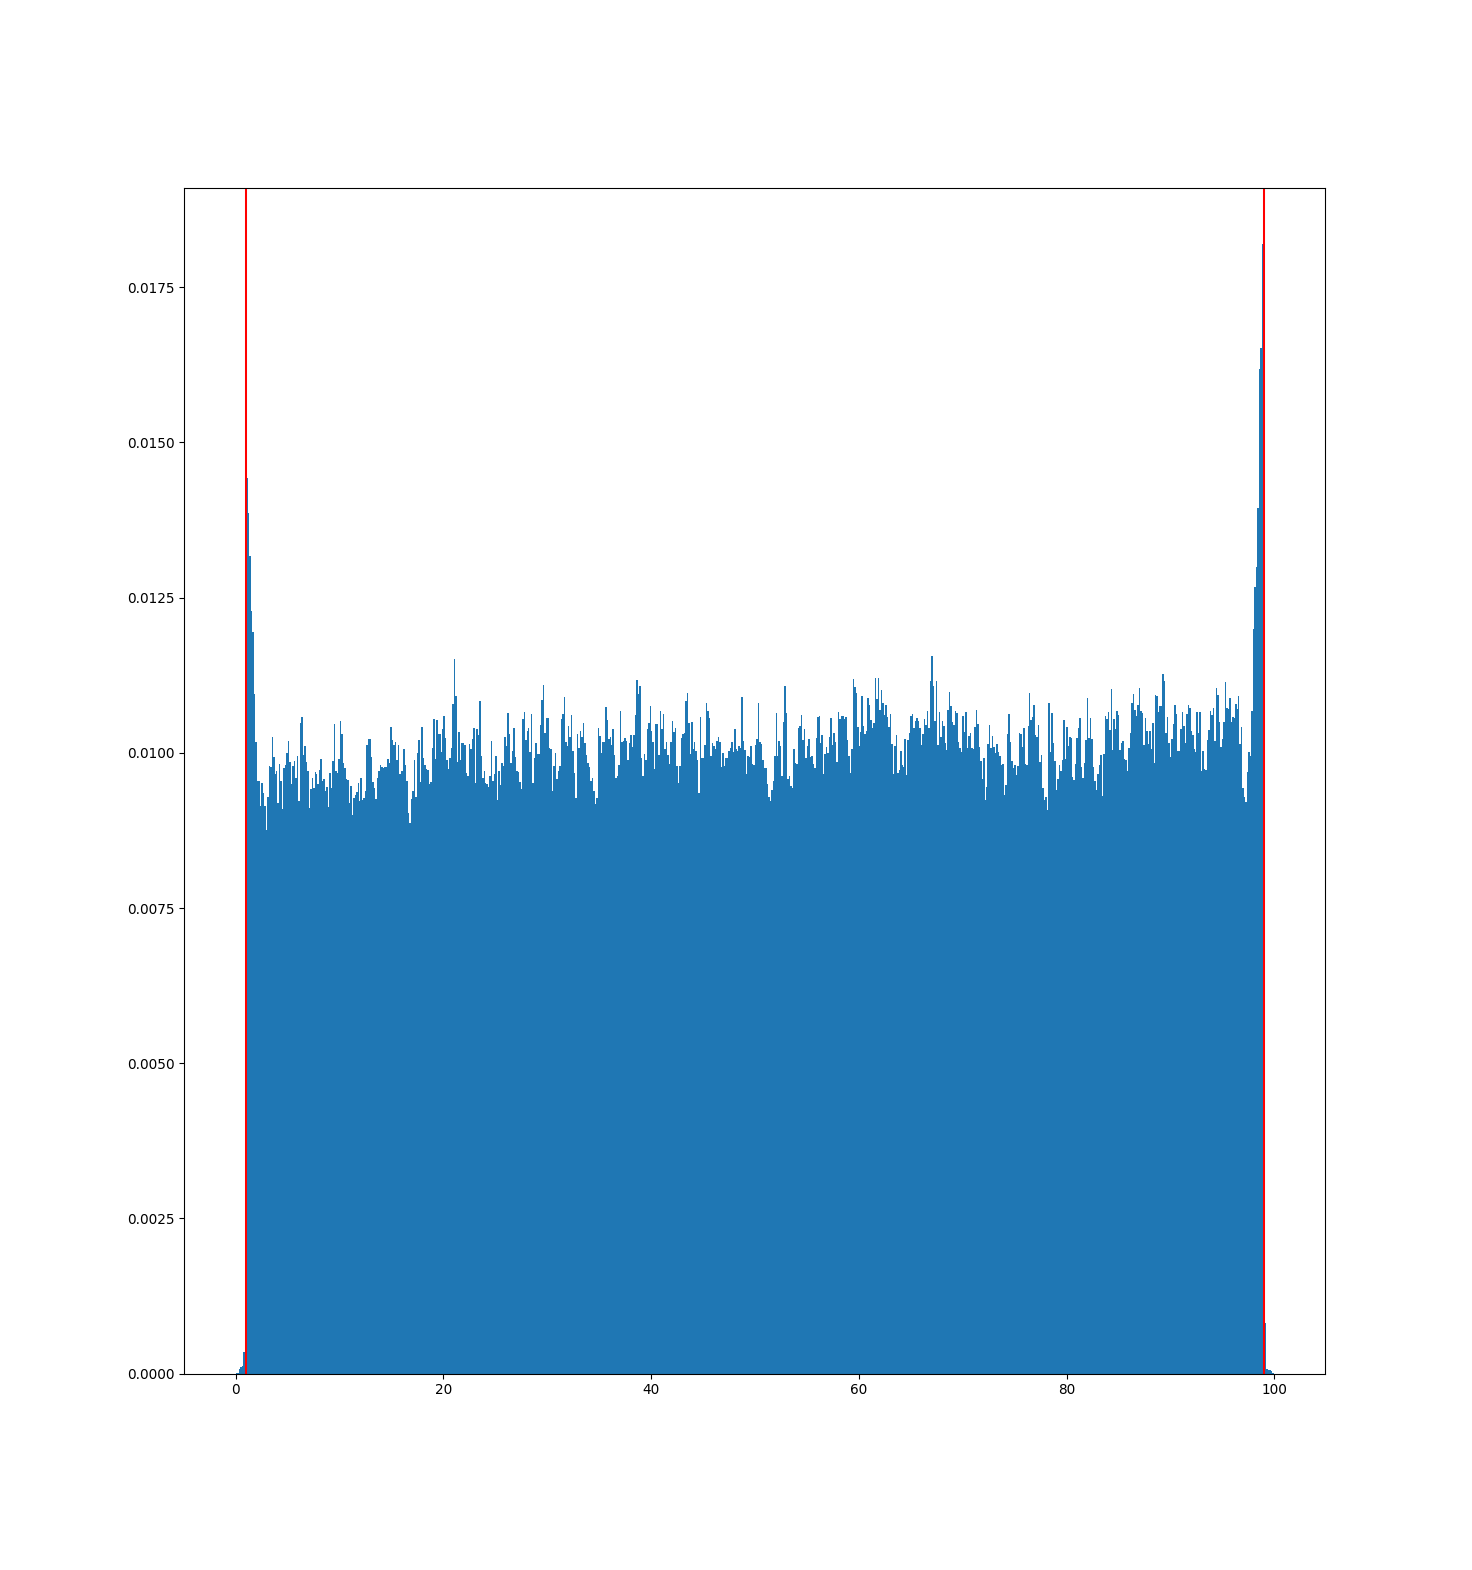

In [61]:
hist(x_pos2, bins = 700, density = 1)
plt.axvline(x=1, color = 'red')
plt.axvline(x=99, color = 'red')
show()


The high density system (0.25)  gives a radial distribution function that is more similar to that of a solid than a gas. Starting at 0 from the sides of the box, the probability raises sharply to give a peak at 1 and 99, this shows a large fraction of particles positioned at the ends of the box. Followed by regular peaks towards the center. The frequency of peaks is larger compared to the low density system, a result of a system with higher ordered structure that has fewer unfilled space.

In [65]:
highDensSim.density

0.2513274122871847